# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

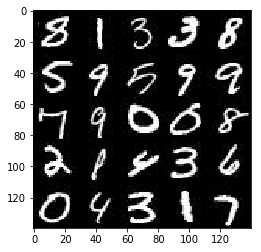

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

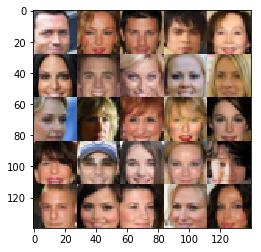

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return inputs_real, inputs_z, learning_rate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # OK: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/dhruva.gupta/anaconda3/lib/p

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
#'''
def discriminator(images, reuse=False,  alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    drop_rate = .2 
    with tf.variable_scope('discriminator', reuse = reuse ):
        #x1 = tf.layers.dropout(images, rate=drop_rate)
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0.0, stddev=0.001))
        #x1 = tf.layers.conv2d(x1, 64, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        #X1 = tf.layers.dropout(x1, rate=drop_rate)
        x1 = tf.maximum(alpha * x1, x1)
        
        # 16x16x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0.0, stddev=0.001))
        #x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(mean = 0.0, stddev=0.001))
        #x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        #x3 = tf.layers.dropout(x3, rate=drop_rate)
        x3 = tf.maximum(alpha * x3, x3)
       
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

'''
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # OK: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits
'''
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        # 7X7X256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    #Generator
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    #Discriminator
    smooth = 0.1
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [var for var in update_ops if var.name.startswith('discriminator')]
    g_updates = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    #g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    #with tf.control_dependencies(g_updates):
    #    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    ''' 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    '''
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape

    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)

   # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)


    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.6286... Generator Loss: 0.4713
Epoch 1/2... Discriminator Loss: 1.2184... Generator Loss: 1.5366
Epoch 1/2... Discriminator Loss: 0.7785... Generator Loss: 1.1544
Epoch 1/2... Discriminator Loss: 0.8086... Generator Loss: 1.9120
Epoch 1/2... Discriminator Loss: 0.3957... Generator Loss: 10.6924
Epoch 1/2... Discriminator Loss: 3.0517... Generator Loss: 14.1463
Epoch 1/2... Discriminator Loss: 0.4722... Generator Loss: 2.4685
Epoch 1/2... Discriminator Loss: 1.2638... Generator Loss: 1.2894
Epoch 1/2... Discriminator Loss: 0.8395... Generator Loss: 1.3245
Epoch 1/2... Discriminator Loss: 0.5099... Generator Loss: 3.0018


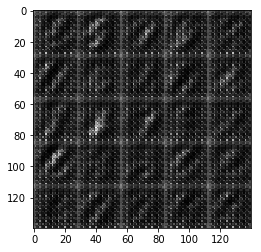

Epoch 1/2... Discriminator Loss: 1.2760... Generator Loss: 0.7250
Epoch 1/2... Discriminator Loss: 0.8779... Generator Loss: 1.2194
Epoch 1/2... Discriminator Loss: 1.0770... Generator Loss: 0.9300
Epoch 1/2... Discriminator Loss: 1.2330... Generator Loss: 1.0819
Epoch 1/2... Discriminator Loss: 2.4667... Generator Loss: 0.1869
Epoch 1/2... Discriminator Loss: 0.5893... Generator Loss: 2.5669
Epoch 1/2... Discriminator Loss: 0.7358... Generator Loss: 3.1255
Epoch 1/2... Discriminator Loss: 0.7375... Generator Loss: 2.7328
Epoch 1/2... Discriminator Loss: 0.6617... Generator Loss: 3.7064
Epoch 1/2... Discriminator Loss: 1.1420... Generator Loss: 0.9058


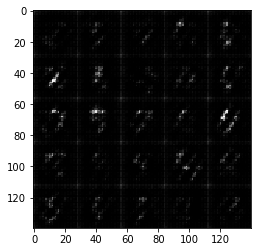

Epoch 1/2... Discriminator Loss: 0.9675... Generator Loss: 1.3784
Epoch 1/2... Discriminator Loss: 0.7676... Generator Loss: 1.7991
Epoch 1/2... Discriminator Loss: 1.2082... Generator Loss: 1.2098
Epoch 1/2... Discriminator Loss: 0.9339... Generator Loss: 1.5703
Epoch 1/2... Discriminator Loss: 1.7105... Generator Loss: 2.9549
Epoch 1/2... Discriminator Loss: 0.6403... Generator Loss: 2.5222
Epoch 1/2... Discriminator Loss: 0.7966... Generator Loss: 1.8530
Epoch 1/2... Discriminator Loss: 0.8609... Generator Loss: 1.2528
Epoch 1/2... Discriminator Loss: 0.6719... Generator Loss: 1.8843
Epoch 1/2... Discriminator Loss: 0.8644... Generator Loss: 1.4274


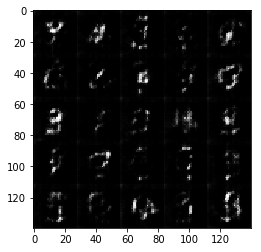

Epoch 1/2... Discriminator Loss: 0.9999... Generator Loss: 1.1995
Epoch 1/2... Discriminator Loss: 1.2005... Generator Loss: 0.6835
Epoch 1/2... Discriminator Loss: 1.8413... Generator Loss: 0.3334
Epoch 1/2... Discriminator Loss: 1.7066... Generator Loss: 0.4808
Epoch 1/2... Discriminator Loss: 0.7654... Generator Loss: 1.8112
Epoch 1/2... Discriminator Loss: 0.8969... Generator Loss: 1.5552
Epoch 1/2... Discriminator Loss: 0.7183... Generator Loss: 2.3211
Epoch 1/2... Discriminator Loss: 1.0141... Generator Loss: 0.9105
Epoch 1/2... Discriminator Loss: 0.8351... Generator Loss: 1.5068
Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 0.5605


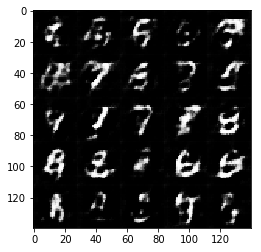

Epoch 1/2... Discriminator Loss: 0.9678... Generator Loss: 0.9208
Epoch 1/2... Discriminator Loss: 0.9906... Generator Loss: 0.8935
Epoch 1/2... Discriminator Loss: 0.7867... Generator Loss: 1.7358
Epoch 1/2... Discriminator Loss: 1.1298... Generator Loss: 0.9024
Epoch 1/2... Discriminator Loss: 1.5005... Generator Loss: 0.6127
Epoch 1/2... Discriminator Loss: 0.8136... Generator Loss: 1.8738
Epoch 1/2... Discriminator Loss: 0.9718... Generator Loss: 1.1250
Epoch 1/2... Discriminator Loss: 1.1163... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.0675... Generator Loss: 0.8871
Epoch 1/2... Discriminator Loss: 2.2523... Generator Loss: 4.5441


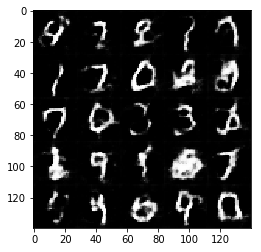

Epoch 1/2... Discriminator Loss: 1.7281... Generator Loss: 0.3776
Epoch 1/2... Discriminator Loss: 1.2133... Generator Loss: 0.7554
Epoch 1/2... Discriminator Loss: 1.2775... Generator Loss: 0.6132
Epoch 1/2... Discriminator Loss: 1.0523... Generator Loss: 0.9090
Epoch 1/2... Discriminator Loss: 1.0434... Generator Loss: 2.7213
Epoch 1/2... Discriminator Loss: 0.7581... Generator Loss: 2.1348
Epoch 1/2... Discriminator Loss: 1.2284... Generator Loss: 2.9111
Epoch 1/2... Discriminator Loss: 0.8874... Generator Loss: 1.6905
Epoch 1/2... Discriminator Loss: 1.1325... Generator Loss: 2.6639
Epoch 1/2... Discriminator Loss: 0.8443... Generator Loss: 1.1601


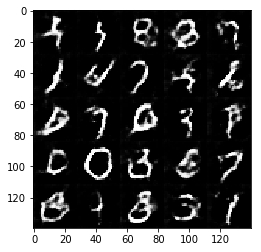

Epoch 1/2... Discriminator Loss: 1.1983... Generator Loss: 0.7327
Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 2.3770
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 1.7647
Epoch 1/2... Discriminator Loss: 1.1186... Generator Loss: 0.8200
Epoch 1/2... Discriminator Loss: 1.1720... Generator Loss: 2.7829
Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 0.8386
Epoch 1/2... Discriminator Loss: 1.2477... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 0.7671... Generator Loss: 2.2632
Epoch 1/2... Discriminator Loss: 1.0752... Generator Loss: 0.9516
Epoch 1/2... Discriminator Loss: 0.9861... Generator Loss: 1.4665


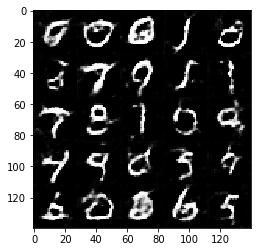

Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 0.6237
Epoch 1/2... Discriminator Loss: 0.9148... Generator Loss: 1.7481
Epoch 1/2... Discriminator Loss: 1.0928... Generator Loss: 1.9973
Epoch 1/2... Discriminator Loss: 0.9844... Generator Loss: 1.0327
Epoch 1/2... Discriminator Loss: 0.8581... Generator Loss: 1.8628
Epoch 1/2... Discriminator Loss: 0.8508... Generator Loss: 1.3725
Epoch 1/2... Discriminator Loss: 1.0782... Generator Loss: 0.7997
Epoch 1/2... Discriminator Loss: 0.9698... Generator Loss: 1.4001
Epoch 1/2... Discriminator Loss: 1.0481... Generator Loss: 0.9416
Epoch 1/2... Discriminator Loss: 0.9057... Generator Loss: 1.6867


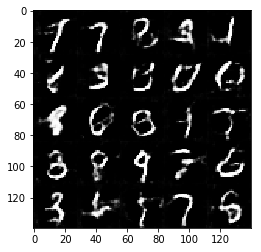

Epoch 1/2... Discriminator Loss: 0.8658... Generator Loss: 1.2091
Epoch 1/2... Discriminator Loss: 1.6165... Generator Loss: 0.4543
Epoch 1/2... Discriminator Loss: 0.7673... Generator Loss: 1.9210
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 1.5466
Epoch 1/2... Discriminator Loss: 1.3093... Generator Loss: 0.5657
Epoch 1/2... Discriminator Loss: 0.9709... Generator Loss: 1.2108
Epoch 1/2... Discriminator Loss: 1.3612... Generator Loss: 0.5382
Epoch 1/2... Discriminator Loss: 0.8533... Generator Loss: 1.3697
Epoch 1/2... Discriminator Loss: 0.9882... Generator Loss: 0.9314
Epoch 1/2... Discriminator Loss: 1.7218... Generator Loss: 0.3477


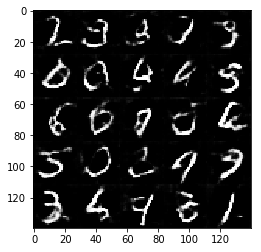

Epoch 1/2... Discriminator Loss: 0.9075... Generator Loss: 1.2236
Epoch 1/2... Discriminator Loss: 0.9053... Generator Loss: 1.7147
Epoch 1/2... Discriminator Loss: 0.7840... Generator Loss: 1.6931
Epoch 1/2... Discriminator Loss: 0.9807... Generator Loss: 0.9887
Epoch 1/2... Discriminator Loss: 0.8825... Generator Loss: 1.2386
Epoch 1/2... Discriminator Loss: 0.7575... Generator Loss: 1.9139
Epoch 1/2... Discriminator Loss: 0.9065... Generator Loss: 1.2841
Epoch 1/2... Discriminator Loss: 1.1484... Generator Loss: 0.7984
Epoch 1/2... Discriminator Loss: 1.3210... Generator Loss: 0.7218
Epoch 1/2... Discriminator Loss: 1.1978... Generator Loss: 0.7173


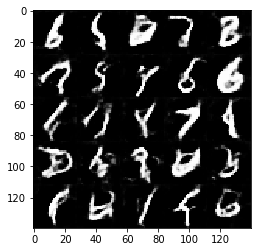

Epoch 1/2... Discriminator Loss: 0.9242... Generator Loss: 1.5574
Epoch 1/2... Discriminator Loss: 1.3162... Generator Loss: 0.6270
Epoch 1/2... Discriminator Loss: 1.1365... Generator Loss: 0.7661
Epoch 1/2... Discriminator Loss: 1.0896... Generator Loss: 1.3475
Epoch 1/2... Discriminator Loss: 1.0021... Generator Loss: 1.1693
Epoch 1/2... Discriminator Loss: 1.0978... Generator Loss: 0.9483
Epoch 1/2... Discriminator Loss: 1.1034... Generator Loss: 0.9217
Epoch 1/2... Discriminator Loss: 0.8396... Generator Loss: 1.3570
Epoch 1/2... Discriminator Loss: 1.0408... Generator Loss: 0.9555
Epoch 1/2... Discriminator Loss: 0.8053... Generator Loss: 1.5127


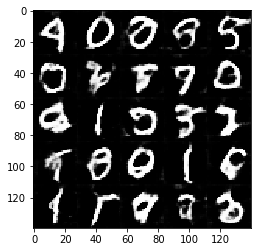

Epoch 1/2... Discriminator Loss: 0.6759... Generator Loss: 1.9392
Epoch 1/2... Discriminator Loss: 0.9923... Generator Loss: 1.0251
Epoch 1/2... Discriminator Loss: 1.0107... Generator Loss: 1.1890
Epoch 1/2... Discriminator Loss: 0.9264... Generator Loss: 0.9861
Epoch 1/2... Discriminator Loss: 0.7312... Generator Loss: 1.7955
Epoch 1/2... Discriminator Loss: 1.1820... Generator Loss: 1.9549
Epoch 1/2... Discriminator Loss: 2.3722... Generator Loss: 0.2761
Epoch 1/2... Discriminator Loss: 0.9577... Generator Loss: 1.5751
Epoch 1/2... Discriminator Loss: 0.8857... Generator Loss: 1.6912
Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 1.2677


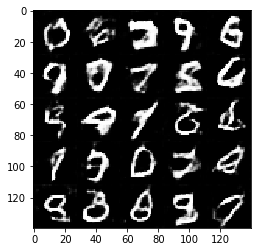

Epoch 1/2... Discriminator Loss: 1.1977... Generator Loss: 2.3191
Epoch 1/2... Discriminator Loss: 0.9318... Generator Loss: 1.2570
Epoch 1/2... Discriminator Loss: 0.9885... Generator Loss: 1.4579
Epoch 1/2... Discriminator Loss: 1.3016... Generator Loss: 0.6051
Epoch 1/2... Discriminator Loss: 1.6699... Generator Loss: 0.5514
Epoch 1/2... Discriminator Loss: 1.3325... Generator Loss: 0.6909
Epoch 1/2... Discriminator Loss: 1.3179... Generator Loss: 0.7225
Epoch 1/2... Discriminator Loss: 0.9201... Generator Loss: 1.3799
Epoch 1/2... Discriminator Loss: 0.9464... Generator Loss: 1.9563
Epoch 1/2... Discriminator Loss: 1.1182... Generator Loss: 1.6420


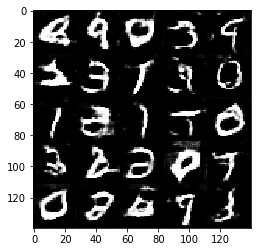

Epoch 1/2... Discriminator Loss: 1.3958... Generator Loss: 0.5470
Epoch 1/2... Discriminator Loss: 1.1835... Generator Loss: 0.8175
Epoch 1/2... Discriminator Loss: 1.0330... Generator Loss: 0.8992
Epoch 1/2... Discriminator Loss: 1.0525... Generator Loss: 0.8542
Epoch 1/2... Discriminator Loss: 1.0958... Generator Loss: 1.0509
Epoch 1/2... Discriminator Loss: 1.2237... Generator Loss: 0.7867
Epoch 1/2... Discriminator Loss: 1.1046... Generator Loss: 0.7936
Epoch 1/2... Discriminator Loss: 2.2058... Generator Loss: 0.2521
Epoch 1/2... Discriminator Loss: 1.0129... Generator Loss: 1.5759
Epoch 1/2... Discriminator Loss: 0.9783... Generator Loss: 2.1867


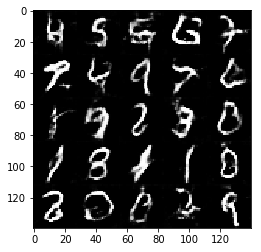

Epoch 1/2... Discriminator Loss: 0.7989... Generator Loss: 1.6492
Epoch 1/2... Discriminator Loss: 0.8194... Generator Loss: 1.2206
Epoch 1/2... Discriminator Loss: 1.7898... Generator Loss: 0.4056
Epoch 1/2... Discriminator Loss: 0.8009... Generator Loss: 2.1519
Epoch 1/2... Discriminator Loss: 1.4363... Generator Loss: 0.6000
Epoch 1/2... Discriminator Loss: 1.0638... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 0.9933... Generator Loss: 0.9702
Epoch 1/2... Discriminator Loss: 1.3431... Generator Loss: 0.5997
Epoch 1/2... Discriminator Loss: 0.8793... Generator Loss: 1.2797
Epoch 1/2... Discriminator Loss: 0.6865... Generator Loss: 1.9116


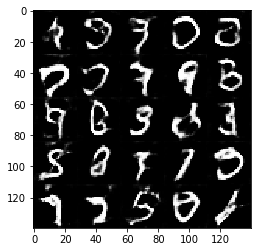

Epoch 1/2... Discriminator Loss: 1.0307... Generator Loss: 0.9371
Epoch 1/2... Discriminator Loss: 1.4416... Generator Loss: 0.5684
Epoch 1/2... Discriminator Loss: 0.9829... Generator Loss: 1.5311
Epoch 1/2... Discriminator Loss: 0.9361... Generator Loss: 1.8575
Epoch 1/2... Discriminator Loss: 0.9221... Generator Loss: 1.4927
Epoch 1/2... Discriminator Loss: 0.8959... Generator Loss: 1.1873
Epoch 1/2... Discriminator Loss: 1.2900... Generator Loss: 1.3417
Epoch 1/2... Discriminator Loss: 1.2169... Generator Loss: 0.6606
Epoch 1/2... Discriminator Loss: 0.8586... Generator Loss: 1.3525
Epoch 1/2... Discriminator Loss: 0.9695... Generator Loss: 1.2013


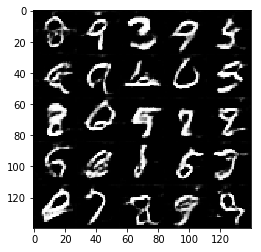

Epoch 1/2... Discriminator Loss: 0.8195... Generator Loss: 1.4831
Epoch 1/2... Discriminator Loss: 1.1253... Generator Loss: 0.7860
Epoch 1/2... Discriminator Loss: 1.3280... Generator Loss: 0.8268
Epoch 1/2... Discriminator Loss: 1.0937... Generator Loss: 0.9219
Epoch 1/2... Discriminator Loss: 1.3349... Generator Loss: 0.6000
Epoch 1/2... Discriminator Loss: 1.0234... Generator Loss: 0.8494
Epoch 1/2... Discriminator Loss: 1.0055... Generator Loss: 1.0215
Epoch 1/2... Discriminator Loss: 0.8146... Generator Loss: 1.2875
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 0.7340
Epoch 1/2... Discriminator Loss: 1.5423... Generator Loss: 0.4848


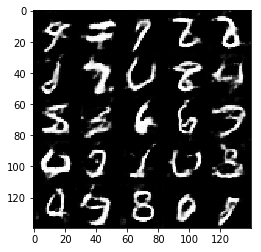

Epoch 1/2... Discriminator Loss: 0.8781... Generator Loss: 1.2507
Epoch 1/2... Discriminator Loss: 0.7315... Generator Loss: 1.8695
Epoch 1/2... Discriminator Loss: 0.8257... Generator Loss: 1.4115
Epoch 1/2... Discriminator Loss: 1.6688... Generator Loss: 2.6212
Epoch 1/2... Discriminator Loss: 0.8826... Generator Loss: 0.9535
Epoch 1/2... Discriminator Loss: 1.1950... Generator Loss: 0.7780
Epoch 1/2... Discriminator Loss: 0.7369... Generator Loss: 2.1427
Epoch 1/2... Discriminator Loss: 0.8047... Generator Loss: 1.2703
Epoch 1/2... Discriminator Loss: 0.9731... Generator Loss: 1.0610
Epoch 1/2... Discriminator Loss: 0.9348... Generator Loss: 1.0129


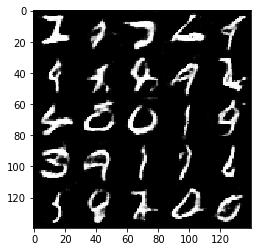

Epoch 1/2... Discriminator Loss: 1.0640... Generator Loss: 0.9316
Epoch 1/2... Discriminator Loss: 1.7463... Generator Loss: 0.3560
Epoch 1/2... Discriminator Loss: 1.4108... Generator Loss: 0.5787
Epoch 1/2... Discriminator Loss: 0.9444... Generator Loss: 0.9360
Epoch 1/2... Discriminator Loss: 1.9492... Generator Loss: 0.3466
Epoch 1/2... Discriminator Loss: 1.2026... Generator Loss: 0.7054
Epoch 1/2... Discriminator Loss: 1.7132... Generator Loss: 0.3666
Epoch 2/2... Discriminator Loss: 0.9889... Generator Loss: 0.9493
Epoch 2/2... Discriminator Loss: 1.6064... Generator Loss: 2.3778
Epoch 2/2... Discriminator Loss: 1.0943... Generator Loss: 2.2121


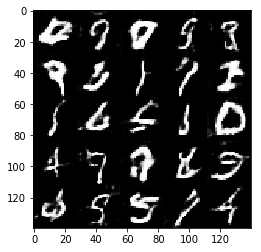

Epoch 2/2... Discriminator Loss: 0.8320... Generator Loss: 1.2764
Epoch 2/2... Discriminator Loss: 1.1373... Generator Loss: 0.8005
Epoch 2/2... Discriminator Loss: 1.1631... Generator Loss: 0.7267
Epoch 2/2... Discriminator Loss: 0.9412... Generator Loss: 1.0572
Epoch 2/2... Discriminator Loss: 1.0580... Generator Loss: 0.8949
Epoch 2/2... Discriminator Loss: 1.0867... Generator Loss: 0.8772
Epoch 2/2... Discriminator Loss: 0.6639... Generator Loss: 1.6602
Epoch 2/2... Discriminator Loss: 1.5850... Generator Loss: 0.5223
Epoch 2/2... Discriminator Loss: 0.7879... Generator Loss: 1.6287
Epoch 2/2... Discriminator Loss: 1.0105... Generator Loss: 0.9679


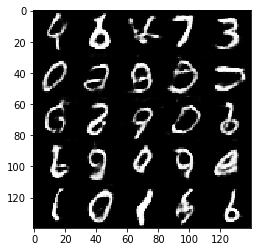

Epoch 2/2... Discriminator Loss: 0.8035... Generator Loss: 1.6182
Epoch 2/2... Discriminator Loss: 1.1093... Generator Loss: 0.9019
Epoch 2/2... Discriminator Loss: 0.6558... Generator Loss: 1.9881
Epoch 2/2... Discriminator Loss: 0.6736... Generator Loss: 1.6163
Epoch 2/2... Discriminator Loss: 0.9036... Generator Loss: 1.1315
Epoch 2/2... Discriminator Loss: 0.8585... Generator Loss: 1.4057
Epoch 2/2... Discriminator Loss: 1.0386... Generator Loss: 0.9666
Epoch 2/2... Discriminator Loss: 1.8522... Generator Loss: 0.3340
Epoch 2/2... Discriminator Loss: 1.2787... Generator Loss: 0.6875
Epoch 2/2... Discriminator Loss: 1.0028... Generator Loss: 0.9173


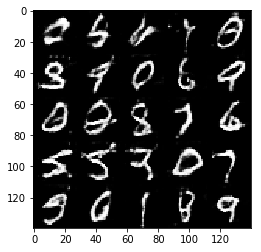

Epoch 2/2... Discriminator Loss: 0.9624... Generator Loss: 2.3954
Epoch 2/2... Discriminator Loss: 0.8488... Generator Loss: 1.2095
Epoch 2/2... Discriminator Loss: 1.1145... Generator Loss: 0.8665
Epoch 2/2... Discriminator Loss: 0.6537... Generator Loss: 1.9995
Epoch 2/2... Discriminator Loss: 0.7333... Generator Loss: 1.5517
Epoch 2/2... Discriminator Loss: 0.8615... Generator Loss: 1.3005
Epoch 2/2... Discriminator Loss: 1.4502... Generator Loss: 0.5677
Epoch 2/2... Discriminator Loss: 1.2317... Generator Loss: 0.6148
Epoch 2/2... Discriminator Loss: 0.9276... Generator Loss: 1.2252
Epoch 2/2... Discriminator Loss: 0.8748... Generator Loss: 1.0939


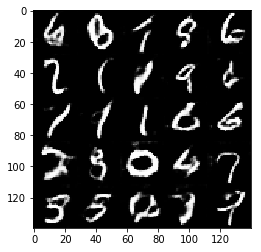

Epoch 2/2... Discriminator Loss: 0.7421... Generator Loss: 1.5585
Epoch 2/2... Discriminator Loss: 1.6501... Generator Loss: 0.4535
Epoch 2/2... Discriminator Loss: 0.7703... Generator Loss: 1.3604
Epoch 2/2... Discriminator Loss: 1.4512... Generator Loss: 0.9546
Epoch 2/2... Discriminator Loss: 0.8560... Generator Loss: 1.3989
Epoch 2/2... Discriminator Loss: 0.9853... Generator Loss: 1.0114
Epoch 2/2... Discriminator Loss: 1.2524... Generator Loss: 0.7580
Epoch 2/2... Discriminator Loss: 1.2901... Generator Loss: 0.6506
Epoch 2/2... Discriminator Loss: 1.2444... Generator Loss: 0.6528
Epoch 2/2... Discriminator Loss: 1.0427... Generator Loss: 0.8350


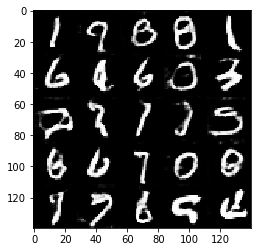

Epoch 2/2... Discriminator Loss: 1.2389... Generator Loss: 0.6793
Epoch 2/2... Discriminator Loss: 0.8633... Generator Loss: 1.2401
Epoch 2/2... Discriminator Loss: 1.1170... Generator Loss: 0.8046
Epoch 2/2... Discriminator Loss: 0.9476... Generator Loss: 1.8875
Epoch 2/2... Discriminator Loss: 0.9829... Generator Loss: 1.1336
Epoch 2/2... Discriminator Loss: 1.4811... Generator Loss: 0.5018
Epoch 2/2... Discriminator Loss: 0.9254... Generator Loss: 1.4125
Epoch 2/2... Discriminator Loss: 0.9406... Generator Loss: 1.1189
Epoch 2/2... Discriminator Loss: 0.6259... Generator Loss: 1.9128
Epoch 2/2... Discriminator Loss: 0.7733... Generator Loss: 1.4430


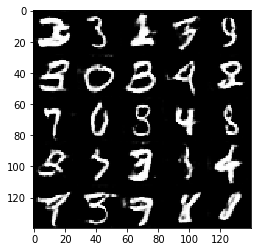

Epoch 2/2... Discriminator Loss: 0.6570... Generator Loss: 1.8937
Epoch 2/2... Discriminator Loss: 0.7978... Generator Loss: 1.6819
Epoch 2/2... Discriminator Loss: 1.3825... Generator Loss: 0.6709
Epoch 2/2... Discriminator Loss: 0.9704... Generator Loss: 0.8875
Epoch 2/2... Discriminator Loss: 1.1482... Generator Loss: 0.7148
Epoch 2/2... Discriminator Loss: 1.1549... Generator Loss: 0.7984
Epoch 2/2... Discriminator Loss: 1.0775... Generator Loss: 1.7938
Epoch 2/2... Discriminator Loss: 0.8347... Generator Loss: 1.3656
Epoch 2/2... Discriminator Loss: 0.8224... Generator Loss: 1.5514
Epoch 2/2... Discriminator Loss: 0.8978... Generator Loss: 1.3147


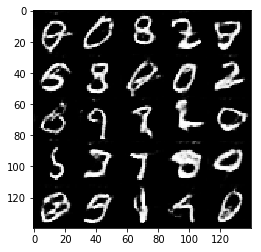

Epoch 2/2... Discriminator Loss: 0.6440... Generator Loss: 2.0770
Epoch 2/2... Discriminator Loss: 1.0994... Generator Loss: 0.9268
Epoch 2/2... Discriminator Loss: 0.7952... Generator Loss: 1.2533
Epoch 2/2... Discriminator Loss: 0.6767... Generator Loss: 1.6888
Epoch 2/2... Discriminator Loss: 0.8924... Generator Loss: 1.0804
Epoch 2/2... Discriminator Loss: 0.9028... Generator Loss: 1.1348
Epoch 2/2... Discriminator Loss: 0.8088... Generator Loss: 1.2938
Epoch 2/2... Discriminator Loss: 0.7357... Generator Loss: 1.4402
Epoch 2/2... Discriminator Loss: 1.6897... Generator Loss: 0.4860
Epoch 2/2... Discriminator Loss: 0.6301... Generator Loss: 2.5393


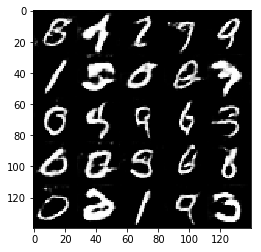

Epoch 2/2... Discriminator Loss: 0.7216... Generator Loss: 1.4714
Epoch 2/2... Discriminator Loss: 0.9096... Generator Loss: 1.0885
Epoch 2/2... Discriminator Loss: 1.0492... Generator Loss: 0.9833
Epoch 2/2... Discriminator Loss: 0.9172... Generator Loss: 2.4820
Epoch 2/2... Discriminator Loss: 0.9936... Generator Loss: 1.0381
Epoch 2/2... Discriminator Loss: 0.7706... Generator Loss: 1.8065
Epoch 2/2... Discriminator Loss: 1.1466... Generator Loss: 0.7490
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.6741
Epoch 2/2... Discriminator Loss: 0.8191... Generator Loss: 1.3811
Epoch 2/2... Discriminator Loss: 1.0484... Generator Loss: 0.8943


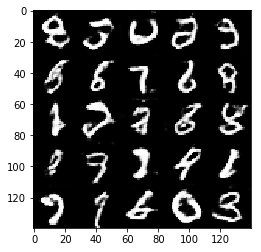

Epoch 2/2... Discriminator Loss: 0.8825... Generator Loss: 1.1604
Epoch 2/2... Discriminator Loss: 0.8872... Generator Loss: 1.0816
Epoch 2/2... Discriminator Loss: 1.5121... Generator Loss: 0.6460
Epoch 2/2... Discriminator Loss: 0.6281... Generator Loss: 2.0326
Epoch 2/2... Discriminator Loss: 0.5961... Generator Loss: 1.9359
Epoch 2/2... Discriminator Loss: 0.6619... Generator Loss: 2.0431
Epoch 2/2... Discriminator Loss: 0.8306... Generator Loss: 1.7804
Epoch 2/2... Discriminator Loss: 1.2716... Generator Loss: 0.7304
Epoch 2/2... Discriminator Loss: 1.2648... Generator Loss: 0.7122
Epoch 2/2... Discriminator Loss: 1.0329... Generator Loss: 0.9576


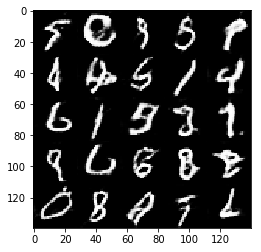

Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 1.1532
Epoch 2/2... Discriminator Loss: 0.8754... Generator Loss: 1.1603
Epoch 2/2... Discriminator Loss: 0.8398... Generator Loss: 1.2377
Epoch 2/2... Discriminator Loss: 1.2446... Generator Loss: 0.7378
Epoch 2/2... Discriminator Loss: 1.1951... Generator Loss: 0.7650
Epoch 2/2... Discriminator Loss: 0.8820... Generator Loss: 2.5187
Epoch 2/2... Discriminator Loss: 0.9892... Generator Loss: 1.0117
Epoch 2/2... Discriminator Loss: 2.4162... Generator Loss: 0.2360
Epoch 2/2... Discriminator Loss: 1.7517... Generator Loss: 0.4965
Epoch 2/2... Discriminator Loss: 1.7972... Generator Loss: 0.4666


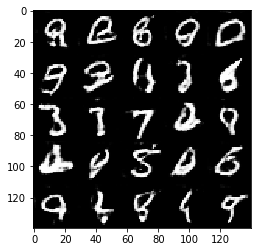

Epoch 2/2... Discriminator Loss: 0.7104... Generator Loss: 1.6179
Epoch 2/2... Discriminator Loss: 0.7748... Generator Loss: 2.0804
Epoch 2/2... Discriminator Loss: 1.5051... Generator Loss: 0.5580
Epoch 2/2... Discriminator Loss: 1.3821... Generator Loss: 3.7866
Epoch 2/2... Discriminator Loss: 1.1328... Generator Loss: 0.7779
Epoch 2/2... Discriminator Loss: 0.5427... Generator Loss: 2.1500
Epoch 2/2... Discriminator Loss: 0.8663... Generator Loss: 1.2519
Epoch 2/2... Discriminator Loss: 0.8215... Generator Loss: 2.3834
Epoch 2/2... Discriminator Loss: 1.8013... Generator Loss: 0.4505
Epoch 2/2... Discriminator Loss: 0.6696... Generator Loss: 1.6679


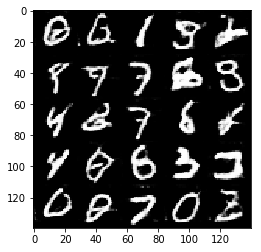

Epoch 2/2... Discriminator Loss: 0.6696... Generator Loss: 1.8001
Epoch 2/2... Discriminator Loss: 0.7666... Generator Loss: 1.3998
Epoch 2/2... Discriminator Loss: 0.9337... Generator Loss: 1.1892
Epoch 2/2... Discriminator Loss: 1.0855... Generator Loss: 1.0626
Epoch 2/2... Discriminator Loss: 0.9068... Generator Loss: 1.1834
Epoch 2/2... Discriminator Loss: 0.8183... Generator Loss: 1.3017
Epoch 2/2... Discriminator Loss: 1.0399... Generator Loss: 1.0525
Epoch 2/2... Discriminator Loss: 0.8824... Generator Loss: 1.6351
Epoch 2/2... Discriminator Loss: 0.8565... Generator Loss: 1.4360
Epoch 2/2... Discriminator Loss: 1.2685... Generator Loss: 0.6972


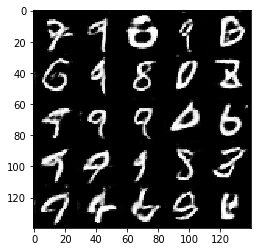

Epoch 2/2... Discriminator Loss: 0.7077... Generator Loss: 1.6411
Epoch 2/2... Discriminator Loss: 0.6806... Generator Loss: 2.0174
Epoch 2/2... Discriminator Loss: 0.8891... Generator Loss: 2.4572
Epoch 2/2... Discriminator Loss: 1.3732... Generator Loss: 0.6055
Epoch 2/2... Discriminator Loss: 0.9066... Generator Loss: 1.0761
Epoch 2/2... Discriminator Loss: 1.9162... Generator Loss: 0.4100
Epoch 2/2... Discriminator Loss: 0.7622... Generator Loss: 2.0000
Epoch 2/2... Discriminator Loss: 1.2885... Generator Loss: 0.8098
Epoch 2/2... Discriminator Loss: 1.0261... Generator Loss: 1.0679
Epoch 2/2... Discriminator Loss: 0.7336... Generator Loss: 1.3830


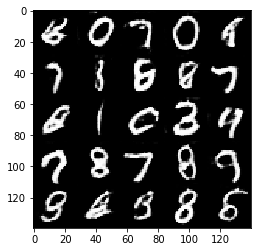

Epoch 2/2... Discriminator Loss: 1.0035... Generator Loss: 1.0185
Epoch 2/2... Discriminator Loss: 0.8865... Generator Loss: 1.0742
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 2.6196
Epoch 2/2... Discriminator Loss: 1.0431... Generator Loss: 0.9868
Epoch 2/2... Discriminator Loss: 1.0953... Generator Loss: 0.8939
Epoch 2/2... Discriminator Loss: 0.9580... Generator Loss: 1.1005
Epoch 2/2... Discriminator Loss: 0.8287... Generator Loss: 2.4350
Epoch 2/2... Discriminator Loss: 0.7701... Generator Loss: 1.4053
Epoch 2/2... Discriminator Loss: 0.8159... Generator Loss: 1.8841
Epoch 2/2... Discriminator Loss: 0.7311... Generator Loss: 1.6959


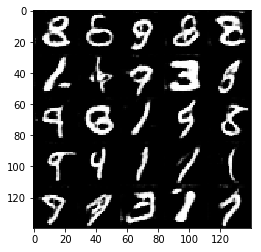

Epoch 2/2... Discriminator Loss: 1.8280... Generator Loss: 0.4496
Epoch 2/2... Discriminator Loss: 1.2454... Generator Loss: 0.7619
Epoch 2/2... Discriminator Loss: 0.9571... Generator Loss: 1.0012
Epoch 2/2... Discriminator Loss: 1.3292... Generator Loss: 0.7307
Epoch 2/2... Discriminator Loss: 1.7656... Generator Loss: 0.3923
Epoch 2/2... Discriminator Loss: 1.4239... Generator Loss: 0.5772
Epoch 2/2... Discriminator Loss: 0.7389... Generator Loss: 1.6092
Epoch 2/2... Discriminator Loss: 0.8426... Generator Loss: 1.3031
Epoch 2/2... Discriminator Loss: 1.0821... Generator Loss: 1.0594
Epoch 2/2... Discriminator Loss: 0.7901... Generator Loss: 1.4690


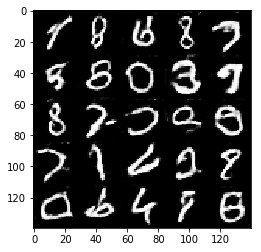

Epoch 2/2... Discriminator Loss: 0.8541... Generator Loss: 1.2039
Epoch 2/2... Discriminator Loss: 0.6697... Generator Loss: 1.7851
Epoch 2/2... Discriminator Loss: 0.6906... Generator Loss: 1.5476
Epoch 2/2... Discriminator Loss: 2.3053... Generator Loss: 4.7225
Epoch 2/2... Discriminator Loss: 0.9913... Generator Loss: 1.0526
Epoch 2/2... Discriminator Loss: 0.9312... Generator Loss: 1.0752
Epoch 2/2... Discriminator Loss: 0.9706... Generator Loss: 0.9547
Epoch 2/2... Discriminator Loss: 1.1360... Generator Loss: 1.1087
Epoch 2/2... Discriminator Loss: 0.9781... Generator Loss: 0.9998
Epoch 2/2... Discriminator Loss: 0.5815... Generator Loss: 2.7537


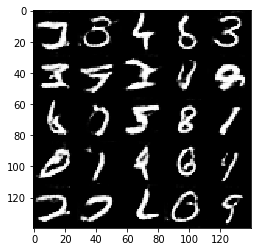

Epoch 2/2... Discriminator Loss: 0.8104... Generator Loss: 1.4432
Epoch 2/2... Discriminator Loss: 0.6947... Generator Loss: 2.1015
Epoch 2/2... Discriminator Loss: 1.2470... Generator Loss: 0.7189
Epoch 2/2... Discriminator Loss: 0.7473... Generator Loss: 1.6803
Epoch 2/2... Discriminator Loss: 0.6194... Generator Loss: 2.1212
Epoch 2/2... Discriminator Loss: 0.8311... Generator Loss: 1.2703
Epoch 2/2... Discriminator Loss: 0.8363... Generator Loss: 1.2257
Epoch 2/2... Discriminator Loss: 0.9116... Generator Loss: 1.0352
Epoch 2/2... Discriminator Loss: 0.6439... Generator Loss: 1.9038
Epoch 2/2... Discriminator Loss: 1.2681... Generator Loss: 0.6482


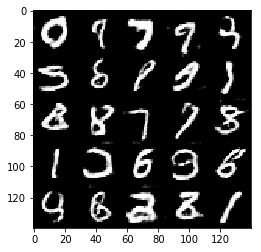

Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 2.4109
Epoch 2/2... Discriminator Loss: 0.8108... Generator Loss: 1.3478
Epoch 2/2... Discriminator Loss: 0.6691... Generator Loss: 2.1123
Epoch 2/2... Discriminator Loss: 0.6501... Generator Loss: 2.3771
Epoch 2/2... Discriminator Loss: 0.6266... Generator Loss: 1.7967
Epoch 2/2... Discriminator Loss: 1.1867... Generator Loss: 0.8224
Epoch 2/2... Discriminator Loss: 0.6953... Generator Loss: 1.7289
Epoch 2/2... Discriminator Loss: 0.6589... Generator Loss: 1.6183
Epoch 2/2... Discriminator Loss: 1.9651... Generator Loss: 0.3959
Epoch 2/2... Discriminator Loss: 0.7188... Generator Loss: 2.1239


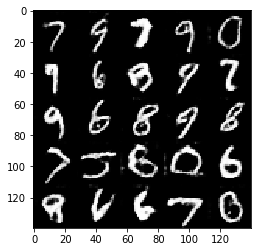

Epoch 2/2... Discriminator Loss: 1.0788... Generator Loss: 0.8794
Epoch 2/2... Discriminator Loss: 1.2235... Generator Loss: 0.7142
Epoch 2/2... Discriminator Loss: 0.9261... Generator Loss: 1.0892
Epoch 2/2... Discriminator Loss: 0.6057... Generator Loss: 1.7494
Epoch 2/2... Discriminator Loss: 2.4522... Generator Loss: 0.2553


In [13]:
batch_size = 32
z_dim = 128
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9476... Generator Loss: 2.3178
Epoch 1/1... Discriminator Loss: 0.8504... Generator Loss: 1.5125
Epoch 1/1... Discriminator Loss: 0.5653... Generator Loss: 2.1754
Epoch 1/1... Discriminator Loss: 0.4601... Generator Loss: 3.9670
Epoch 1/1... Discriminator Loss: 0.7130... Generator Loss: 2.7319
Epoch 1/1... Discriminator Loss: 0.7844... Generator Loss: 2.3608
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 1.3902
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 1.5547
Epoch 1/1... Discriminator Loss: 0.9079... Generator Loss: 2.5668


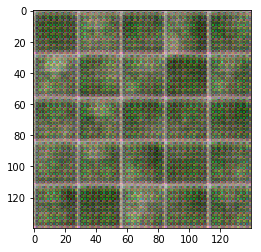

Epoch 1/1... Discriminator Loss: 0.8747... Generator Loss: 1.5153
Epoch 1/1... Discriminator Loss: 1.6380... Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 0.9595... Generator Loss: 1.1296
Epoch 1/1... Discriminator Loss: 0.7541... Generator Loss: 1.4769
Epoch 1/1... Discriminator Loss: 0.7943... Generator Loss: 1.6062
Epoch 1/1... Discriminator Loss: 0.7122... Generator Loss: 1.9100
Epoch 1/1... Discriminator Loss: 1.8700... Generator Loss: 0.3863
Epoch 1/1... Discriminator Loss: 0.9947... Generator Loss: 2.5288
Epoch 1/1... Discriminator Loss: 1.7441... Generator Loss: 0.6568
Epoch 1/1... Discriminator Loss: 1.5800... Generator Loss: 1.0332


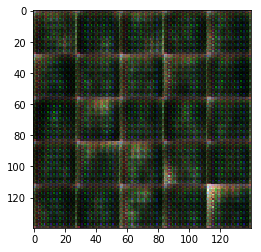

Epoch 1/1... Discriminator Loss: 1.0743... Generator Loss: 1.1210
Epoch 1/1... Discriminator Loss: 1.1858... Generator Loss: 1.4530
Epoch 1/1... Discriminator Loss: 1.1728... Generator Loss: 1.1158
Epoch 1/1... Discriminator Loss: 1.7319... Generator Loss: 2.8009
Epoch 1/1... Discriminator Loss: 1.2153... Generator Loss: 0.8172
Epoch 1/1... Discriminator Loss: 1.9725... Generator Loss: 0.3228
Epoch 1/1... Discriminator Loss: 2.8755... Generator Loss: 3.5869
Epoch 1/1... Discriminator Loss: 1.1198... Generator Loss: 1.1514
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 1.0063
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 2.0878


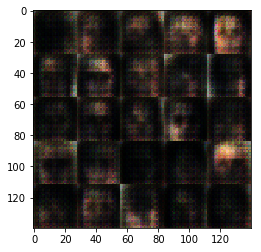

Epoch 1/1... Discriminator Loss: 1.4635... Generator Loss: 2.2466
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.5595
Epoch 1/1... Discriminator Loss: 1.0293... Generator Loss: 1.0696
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 0.9306
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.0585... Generator Loss: 1.4118
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.8210
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 1.0579
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 0.9940
Epoch 1/1... Discriminator Loss: 1.2470... Generator Loss: 0.7613


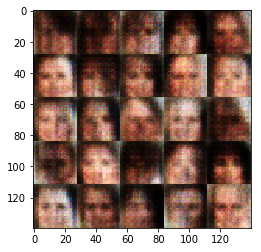

Epoch 1/1... Discriminator Loss: 1.1264... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.5790... Generator Loss: 2.5667
Epoch 1/1... Discriminator Loss: 1.8331... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 2.7030
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 1.6104
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 1.0004
Epoch 1/1... Discriminator Loss: 1.0140... Generator Loss: 1.2126
Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 0.8754


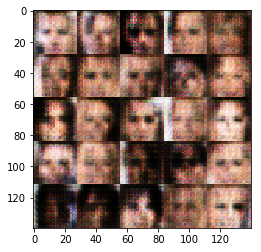

Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 2.2527... Generator Loss: 0.1892
Epoch 1/1... Discriminator Loss: 1.1632... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 1.5822
Epoch 1/1... Discriminator Loss: 1.1107... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.5137
Epoch 1/1... Discriminator Loss: 0.9719... Generator Loss: 1.0791
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.9160
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.7074


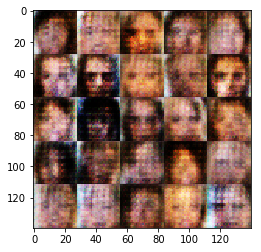

Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.5710
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.9315
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 1.4688
Epoch 1/1... Discriminator Loss: 1.6260... Generator Loss: 2.2335
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.6340... Generator Loss: 0.4057
Epoch 1/1... Discriminator Loss: 1.2218... Generator Loss: 1.0484
Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 1.2282


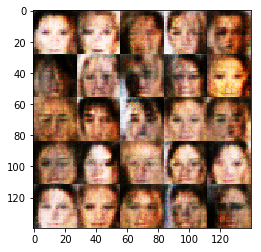

Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.2802... Generator Loss: 1.1568
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 1.2033
Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 1.7158
Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 1.0161
Epoch 1/1... Discriminator Loss: 1.1657... Generator Loss: 1.0106
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 1.5479... Generator Loss: 1.6658
Epoch 1/1... Discriminator Loss: 1.1014... Generator Loss: 1.0009
Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 1.5524


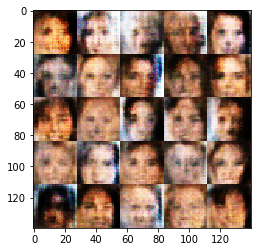

Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 1.0736
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.9686
Epoch 1/1... Discriminator Loss: 1.1407... Generator Loss: 0.9148
Epoch 1/1... Discriminator Loss: 1.2340... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 0.9464
Epoch 1/1... Discriminator Loss: 1.9084... Generator Loss: 2.4088
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 0.8805
Epoch 1/1... Discriminator Loss: 1.2108... Generator Loss: 0.8734
Epoch 1/1... Discriminator Loss: 1.1666... Generator Loss: 0.9364


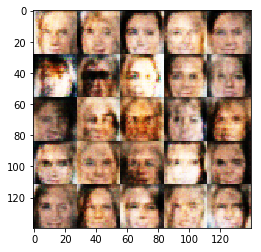

Epoch 1/1... Discriminator Loss: 1.4918... Generator Loss: 0.4770
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 0.5502
Epoch 1/1... Discriminator Loss: 1.2256... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 0.8416
Epoch 1/1... Discriminator Loss: 1.2191... Generator Loss: 1.0522
Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.1265... Generator Loss: 1.0786
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 1.3969
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 1.5882
Epoch 1/1... Discriminator Loss: 1.7255... Generator Loss: 0.3619


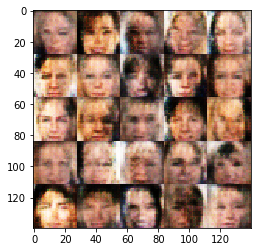

Epoch 1/1... Discriminator Loss: 1.1853... Generator Loss: 1.2362
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.9258
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 1.9498
Epoch 1/1... Discriminator Loss: 1.1390... Generator Loss: 0.7305
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 0.7508
Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 1.8523
Epoch 1/1... Discriminator Loss: 1.0053... Generator Loss: 0.9502


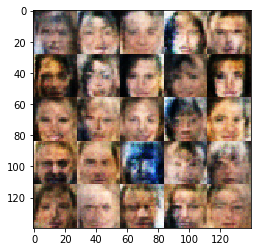

Epoch 1/1... Discriminator Loss: 1.0449... Generator Loss: 1.2951
Epoch 1/1... Discriminator Loss: 1.0966... Generator Loss: 1.0468
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.5924... Generator Loss: 1.2197
Epoch 1/1... Discriminator Loss: 1.2406... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.5506... Generator Loss: 0.4705
Epoch 1/1... Discriminator Loss: 1.1845... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.5988... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.1923... Generator Loss: 0.8948


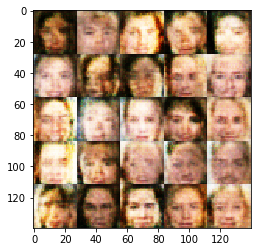

Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 1.0063
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 1.2195
Epoch 1/1... Discriminator Loss: 1.4939... Generator Loss: 1.5496
Epoch 1/1... Discriminator Loss: 1.2627... Generator Loss: 1.3832
Epoch 1/1... Discriminator Loss: 1.0848... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 1.4711... Generator Loss: 0.5229
Epoch 1/1... Discriminator Loss: 1.1702... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 1.2233
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 0.9077
Epoch 1/1... Discriminator Loss: 0.9715... Generator Loss: 1.1449


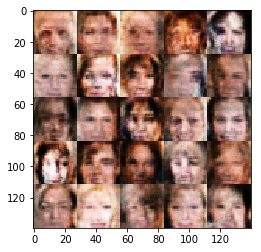

Epoch 1/1... Discriminator Loss: 1.0697... Generator Loss: 1.7239
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.0350... Generator Loss: 2.0127
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 1.5548
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 0.9564... Generator Loss: 1.1108
Epoch 1/1... Discriminator Loss: 1.0763... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.9439


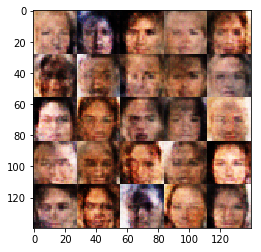

Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.6616
Epoch 1/1... Discriminator Loss: 1.2395... Generator Loss: 1.1985
Epoch 1/1... Discriminator Loss: 1.1108... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.0532... Generator Loss: 1.0677
Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.6006... Generator Loss: 0.4137
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 0.8645
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.0906... Generator Loss: 1.5140
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 1.2960


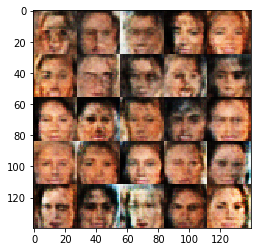

Epoch 1/1... Discriminator Loss: 1.1758... Generator Loss: 1.0878
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 1.1759
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.6055
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 0.9167
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 1.0255
Epoch 1/1... Discriminator Loss: 1.1487... Generator Loss: 0.9547
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 2.1345
Epoch 1/1... Discriminator Loss: 1.0632... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.7137


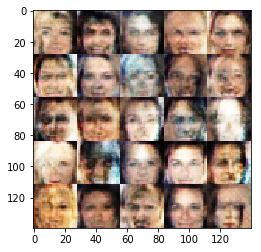

Epoch 1/1... Discriminator Loss: 1.0404... Generator Loss: 1.1640
Epoch 1/1... Discriminator Loss: 1.2709... Generator Loss: 1.2279
Epoch 1/1... Discriminator Loss: 1.1733... Generator Loss: 0.8498
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 1.1414... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 1.2011... Generator Loss: 1.4574
Epoch 1/1... Discriminator Loss: 1.0035... Generator Loss: 0.8570
Epoch 1/1... Discriminator Loss: 1.3541... Generator Loss: 1.0546
Epoch 1/1... Discriminator Loss: 1.2404... Generator Loss: 1.0905
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.4637


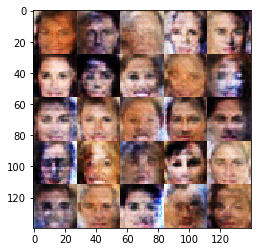

Epoch 1/1... Discriminator Loss: 1.2768... Generator Loss: 1.1021
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 1.0769... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 1.1893... Generator Loss: 0.9434
Epoch 1/1... Discriminator Loss: 1.1178... Generator Loss: 1.2057
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.1230... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.5348... Generator Loss: 1.4691
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.6645


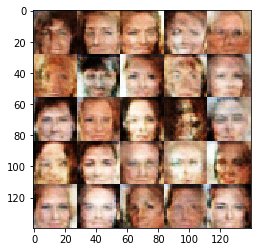

Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 1.1479
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.5785... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.6334
Epoch 1/1... Discriminator Loss: 1.5996... Generator Loss: 1.6693
Epoch 1/1... Discriminator Loss: 1.2263... Generator Loss: 0.7482
Epoch 1/1... Discriminator Loss: 1.0245... Generator Loss: 0.9939
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 1.1819... Generator Loss: 0.9180


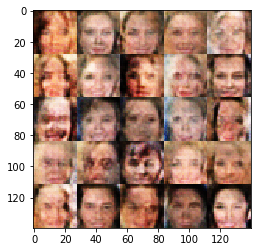

Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.0677... Generator Loss: 0.9235
Epoch 1/1... Discriminator Loss: 1.0749... Generator Loss: 1.0494
Epoch 1/1... Discriminator Loss: 1.8178... Generator Loss: 0.3256
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.5860
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 1.4645
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 1.5276
Epoch 1/1... Discriminator Loss: 1.1413... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 1.3753
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 1.0089


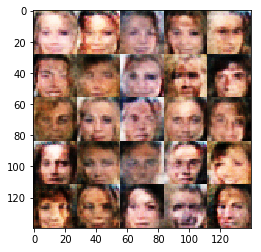

Epoch 1/1... Discriminator Loss: 1.5088... Generator Loss: 0.4846
Epoch 1/1... Discriminator Loss: 0.9582... Generator Loss: 1.0731
Epoch 1/1... Discriminator Loss: 1.1049... Generator Loss: 1.3290
Epoch 1/1... Discriminator Loss: 1.5962... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.8950
Epoch 1/1... Discriminator Loss: 0.8534... Generator Loss: 1.3449
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.5816
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.8748


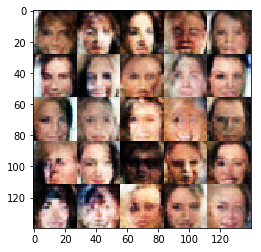

Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.8492
Epoch 1/1... Discriminator Loss: 1.5738... Generator Loss: 1.5648
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.6226
Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.7598
Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 1.7384
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 0.8254
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 1.3351
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 1.0672... Generator Loss: 0.9276
Epoch 1/1... Discriminator Loss: 1.1977... Generator Loss: 1.3404


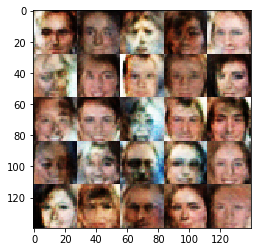

Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.4219
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.5100
Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 1.0174
Epoch 1/1... Discriminator Loss: 1.9056... Generator Loss: 0.2864
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.4944
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 1.9877
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.6695
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 1.2829
Epoch 1/1... Discriminator Loss: 1.2277... Generator Loss: 0.6942


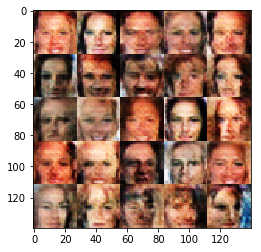

Epoch 1/1... Discriminator Loss: 1.0027... Generator Loss: 1.0364
Epoch 1/1... Discriminator Loss: 1.1637... Generator Loss: 0.8415
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.7754
Epoch 1/1... Discriminator Loss: 1.0719... Generator Loss: 1.5081
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.0123... Generator Loss: 0.9296
Epoch 1/1... Discriminator Loss: 0.9828... Generator Loss: 1.1647
Epoch 1/1... Discriminator Loss: 1.5668... Generator Loss: 0.4479
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 1.1617
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.4606


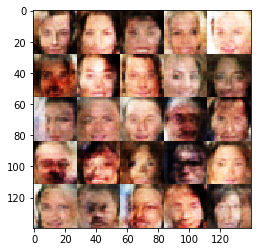

Epoch 1/1... Discriminator Loss: 1.0634... Generator Loss: 1.1887
Epoch 1/1... Discriminator Loss: 1.0400... Generator Loss: 1.1409
Epoch 1/1... Discriminator Loss: 1.1177... Generator Loss: 0.9932
Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.5255
Epoch 1/1... Discriminator Loss: 0.9698... Generator Loss: 1.3095
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 1.2664
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.6237
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.0708... Generator Loss: 1.0959
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.7785


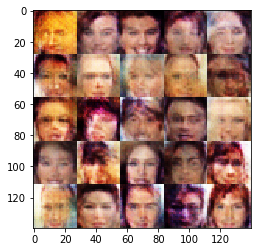

Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 1.1759... Generator Loss: 0.9834
Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 1.0057
Epoch 1/1... Discriminator Loss: 0.9824... Generator Loss: 1.4346
Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 1.6686
Epoch 1/1... Discriminator Loss: 1.0158... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 1.1987... Generator Loss: 1.0352
Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 1.5789
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.2627... Generator Loss: 0.7246


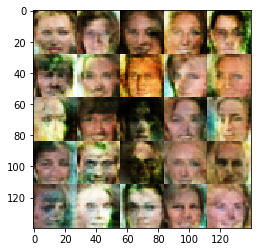

Epoch 1/1... Discriminator Loss: 1.5104... Generator Loss: 1.7816
Epoch 1/1... Discriminator Loss: 1.0227... Generator Loss: 1.5958
Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 1.2886
Epoch 1/1... Discriminator Loss: 1.1970... Generator Loss: 1.8883
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 1.0439
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 2.0000
Epoch 1/1... Discriminator Loss: 1.0677... Generator Loss: 1.1282
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.6211


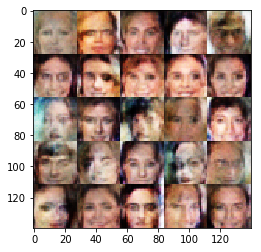

Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.5272
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.5497
Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 1.3802
Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.4740
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 1.1520... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 0.9975... Generator Loss: 0.9763
Epoch 1/1... Discriminator Loss: 0.8523... Generator Loss: 1.2974
Epoch 1/1... Discriminator Loss: 1.9692... Generator Loss: 0.2623
Epoch 1/1... Discriminator Loss: 0.9529... Generator Loss: 1.2968


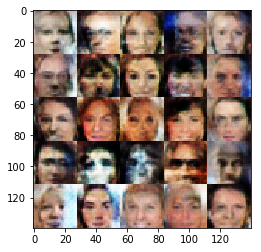

Epoch 1/1... Discriminator Loss: 0.9104... Generator Loss: 1.3099
Epoch 1/1... Discriminator Loss: 2.1367... Generator Loss: 0.2726
Epoch 1/1... Discriminator Loss: 1.1517... Generator Loss: 1.7787
Epoch 1/1... Discriminator Loss: 0.7885... Generator Loss: 1.6691
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 0.8647... Generator Loss: 1.1630
Epoch 1/1... Discriminator Loss: 1.1317... Generator Loss: 1.4347
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 1.5987... Generator Loss: 0.4096


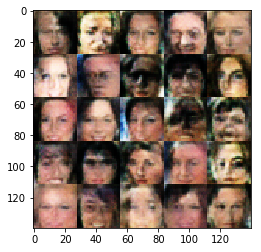

Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 1.2408
Epoch 1/1... Discriminator Loss: 1.1276... Generator Loss: 0.8912
Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 1.0984
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 2.1464
Epoch 1/1... Discriminator Loss: 0.9827... Generator Loss: 1.6184
Epoch 1/1... Discriminator Loss: 0.9656... Generator Loss: 1.4493
Epoch 1/1... Discriminator Loss: 1.2013... Generator Loss: 0.8486
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.8086


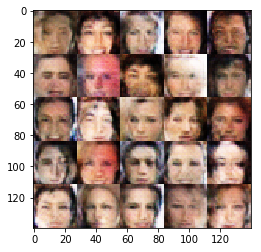

Epoch 1/1... Discriminator Loss: 0.9113... Generator Loss: 1.5113
Epoch 1/1... Discriminator Loss: 1.1094... Generator Loss: 1.2516
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.5225... Generator Loss: 0.4593
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.3898
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 1.2617
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 0.7711
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.5315
Epoch 1/1... Discriminator Loss: 1.0632... Generator Loss: 0.9746


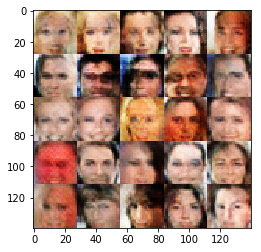

Epoch 1/1... Discriminator Loss: 1.2049... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 2.0463
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.1211
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 1.1433
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 1.0938
Epoch 1/1... Discriminator Loss: 1.0711... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.0713... Generator Loss: 1.1068
Epoch 1/1... Discriminator Loss: 0.9597... Generator Loss: 1.2643


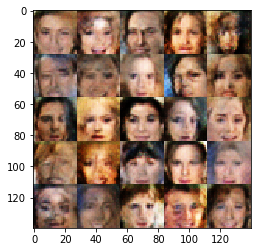

Epoch 1/1... Discriminator Loss: 1.5336... Generator Loss: 0.4407
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.0141
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 1.0424
Epoch 1/1... Discriminator Loss: 0.9964... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 1.1743
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.5328
Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 0.8437
Epoch 1/1... Discriminator Loss: 1.2095... Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.1631... Generator Loss: 0.9535
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.5919


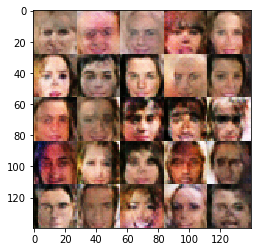

Epoch 1/1... Discriminator Loss: 1.1476... Generator Loss: 1.7053
Epoch 1/1... Discriminator Loss: 1.0146... Generator Loss: 1.0894
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 1.3492
Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 0.9977
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.5170
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.5579
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 1.7254
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 1.7817
Epoch 1/1... Discriminator Loss: 0.9787... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 1.0498... Generator Loss: 1.0349


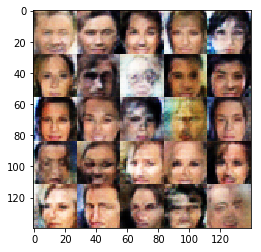

Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.7317
Epoch 1/1... Discriminator Loss: 1.3288... Generator Loss: 0.9589
Epoch 1/1... Discriminator Loss: 1.0353... Generator Loss: 1.1302
Epoch 1/1... Discriminator Loss: 0.9414... Generator Loss: 1.1015
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 0.9125
Epoch 1/1... Discriminator Loss: 0.9173... Generator Loss: 1.2757
Epoch 1/1... Discriminator Loss: 1.1819... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.0544... Generator Loss: 0.9366
Epoch 1/1... Discriminator Loss: 1.2357... Generator Loss: 2.3715
Epoch 1/1... Discriminator Loss: 0.9644... Generator Loss: 1.2093


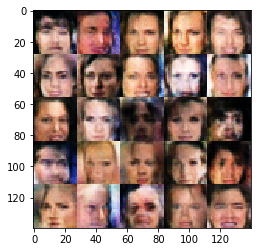

Epoch 1/1... Discriminator Loss: 1.5164... Generator Loss: 0.4357
Epoch 1/1... Discriminator Loss: 1.1659... Generator Loss: 1.0285
Epoch 1/1... Discriminator Loss: 0.9788... Generator Loss: 1.0400
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.7783
Epoch 1/1... Discriminator Loss: 1.0823... Generator Loss: 1.1462
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 2.1198
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.8920
Epoch 1/1... Discriminator Loss: 1.1647... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 0.9385... Generator Loss: 1.1589


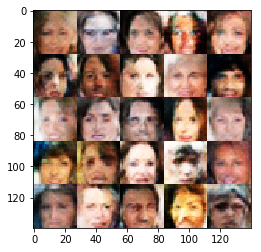

Epoch 1/1... Discriminator Loss: 1.1387... Generator Loss: 1.8542
Epoch 1/1... Discriminator Loss: 1.1545... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 0.9273... Generator Loss: 1.1275
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.5911
Epoch 1/1... Discriminator Loss: 1.9667... Generator Loss: 0.2652
Epoch 1/1... Discriminator Loss: 1.2631... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 0.9814... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 1.5920... Generator Loss: 0.4046
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 1.3446
Epoch 1/1... Discriminator Loss: 1.1668... Generator Loss: 1.1225


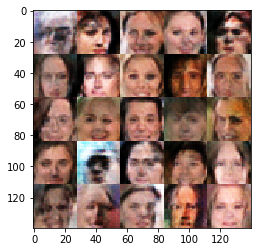

Epoch 1/1... Discriminator Loss: 1.0390... Generator Loss: 1.0632
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.8221
Epoch 1/1... Discriminator Loss: 1.5772... Generator Loss: 0.3988
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 2.5279
Epoch 1/1... Discriminator Loss: 1.5339... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.5392
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.1168


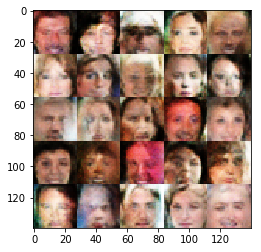

Epoch 1/1... Discriminator Loss: 0.9663... Generator Loss: 1.3961
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.7528
Epoch 1/1... Discriminator Loss: 1.6305... Generator Loss: 0.3911
Epoch 1/1... Discriminator Loss: 1.1555... Generator Loss: 1.8379
Epoch 1/1... Discriminator Loss: 1.1221... Generator Loss: 0.7840
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.9453
Epoch 1/1... Discriminator Loss: 0.9849... Generator Loss: 1.1200
Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 1.2131


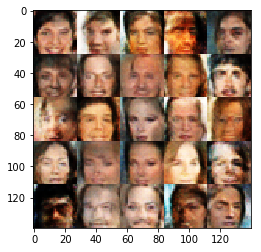

Epoch 1/1... Discriminator Loss: 1.0340... Generator Loss: 0.8464
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 0.8990
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 2.3184... Generator Loss: 0.2175
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.4931
Epoch 1/1... Discriminator Loss: 1.0719... Generator Loss: 1.1272
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.4775
Epoch 1/1... Discriminator Loss: 0.7357... Generator Loss: 1.4390
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 1.4618
Epoch 1/1... Discriminator Loss: 1.0947... Generator Loss: 1.3371


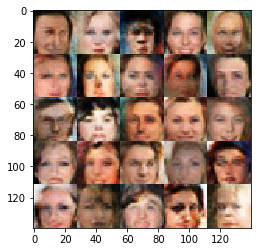

Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 0.7077
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.3137
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 0.9236... Generator Loss: 1.0503
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.0431
Epoch 1/1... Discriminator Loss: 1.1747... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 0.9572
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 0.9016
Epoch 1/1... Discriminator Loss: 1.5190... Generator Loss: 0.4660


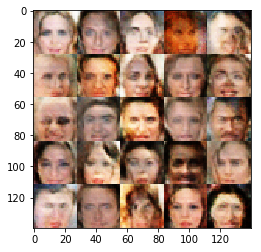

Epoch 1/1... Discriminator Loss: 1.0942... Generator Loss: 0.9466
Epoch 1/1... Discriminator Loss: 1.0218... Generator Loss: 0.9288
Epoch 1/1... Discriminator Loss: 0.8651... Generator Loss: 1.2643
Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 1.6180
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 1.1578
Epoch 1/1... Discriminator Loss: 1.1834... Generator Loss: 2.2175
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.6215
Epoch 1/1... Discriminator Loss: 1.1394... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 0.9188
Epoch 1/1... Discriminator Loss: 1.0545... Generator Loss: 0.8085


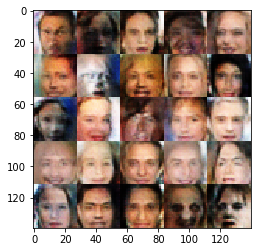

Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 0.7223
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.0954... Generator Loss: 1.7087
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 0.8750... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 1.0700... Generator Loss: 1.5253
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.5944
Epoch 1/1... Discriminator Loss: 1.1669... Generator Loss: 1.1168
Epoch 1/1... Discriminator Loss: 0.9018... Generator Loss: 1.5230
Epoch 1/1... Discriminator Loss: 1.0760... Generator Loss: 0.9559


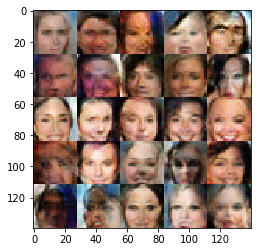

Epoch 1/1... Discriminator Loss: 1.2109... Generator Loss: 1.5879
Epoch 1/1... Discriminator Loss: 0.8886... Generator Loss: 1.2415
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 1.5445
Epoch 1/1... Discriminator Loss: 1.2285... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.5526
Epoch 1/1... Discriminator Loss: 1.0277... Generator Loss: 1.3251
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.0854... Generator Loss: 0.8766
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 0.9000
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 1.6504


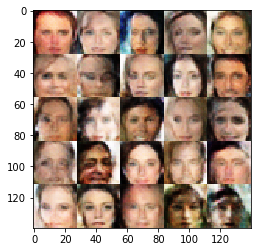

Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 1.2346
Epoch 1/1... Discriminator Loss: 1.1139... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 1.3293
Epoch 1/1... Discriminator Loss: 1.0546... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 0.7873... Generator Loss: 1.5234
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 1.6541
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.4801
Epoch 1/1... Discriminator Loss: 0.7130... Generator Loss: 1.9426
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 1.4482
Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.8822


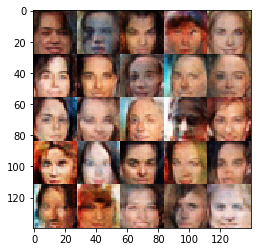

Epoch 1/1... Discriminator Loss: 0.8629... Generator Loss: 1.1579
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.5148
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 2.0639
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.9423
Epoch 1/1... Discriminator Loss: 1.6244... Generator Loss: 0.4511
Epoch 1/1... Discriminator Loss: 0.9061... Generator Loss: 1.2486
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 1.4994
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 0.8681
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 1.0016


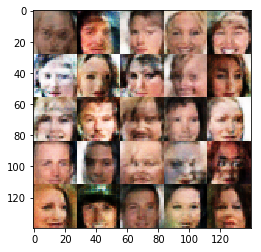

Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 1.3422
Epoch 1/1... Discriminator Loss: 1.1450... Generator Loss: 0.9206
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 1.1907
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.0219... Generator Loss: 0.9377
Epoch 1/1... Discriminator Loss: 1.5698... Generator Loss: 0.4338
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.0039... Generator Loss: 1.2384


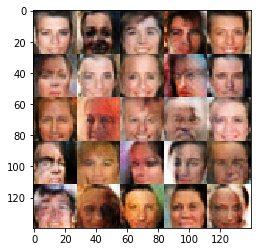

Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.6019
Epoch 1/1... Discriminator Loss: 1.1938... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 0.9007... Generator Loss: 1.6243
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.0538... Generator Loss: 1.7914
Epoch 1/1... Discriminator Loss: 0.9356... Generator Loss: 1.3032
Epoch 1/1... Discriminator Loss: 0.9292... Generator Loss: 1.1397
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.3541


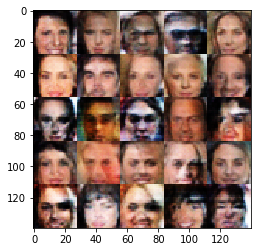

Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 1.0681
Epoch 1/1... Discriminator Loss: 0.9213... Generator Loss: 1.3785
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.1010... Generator Loss: 0.9816
Epoch 1/1... Discriminator Loss: 1.0517... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 1.6124... Generator Loss: 1.4231
Epoch 1/1... Discriminator Loss: 1.0766... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 0.8090... Generator Loss: 1.9180


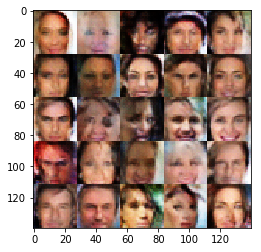

Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 1.9439
Epoch 1/1... Discriminator Loss: 1.1775... Generator Loss: 0.8899
Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.7874
Epoch 1/1... Discriminator Loss: 1.5148... Generator Loss: 0.5124
Epoch 1/1... Discriminator Loss: 1.0495... Generator Loss: 1.7782
Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.7518
Epoch 1/1... Discriminator Loss: 1.0921... Generator Loss: 0.8733
Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 0.6285
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 1.6933


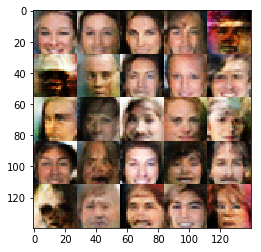

Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.9372
Epoch 1/1... Discriminator Loss: 1.1227... Generator Loss: 0.9709
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.4835
Epoch 1/1... Discriminator Loss: 1.2165... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.5943... Generator Loss: 0.4403
Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 1.1934
Epoch 1/1... Discriminator Loss: 1.4738... Generator Loss: 0.4457
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.5912
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.9815


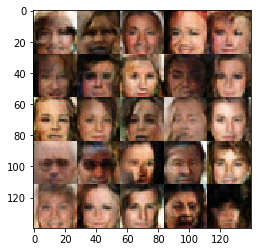

Epoch 1/1... Discriminator Loss: 1.1564... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.1563... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 0.9909... Generator Loss: 0.9548
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 0.9764... Generator Loss: 1.0489
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.1334
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.1026... Generator Loss: 1.6724
Epoch 1/1... Discriminator Loss: 0.9680... Generator Loss: 1.4351


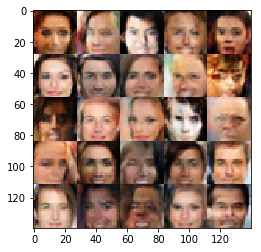

Epoch 1/1... Discriminator Loss: 1.0710... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 0.9087... Generator Loss: 1.2562
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.4120
Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 0.5906
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 0.9646
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 1.5318
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.9034
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.6131


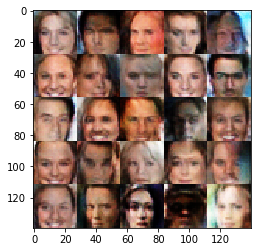

Epoch 1/1... Discriminator Loss: 0.7958... Generator Loss: 2.0629
Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 1.3371
Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.1669... Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.5768
Epoch 1/1... Discriminator Loss: 1.0788... Generator Loss: 0.9243
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 1.1648
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.5588
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.5266


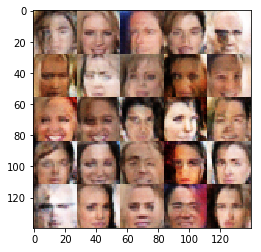

Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 1.3539
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 1.0585... Generator Loss: 0.8258
Epoch 1/1... Discriminator Loss: 0.8032... Generator Loss: 1.3432
Epoch 1/1... Discriminator Loss: 1.4570... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.1449... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.7240
Epoch 1/1... Discriminator Loss: 1.0902... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.5099
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.6013


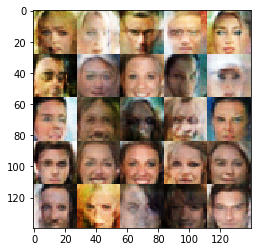

Epoch 1/1... Discriminator Loss: 1.0760... Generator Loss: 1.0127
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 0.9577
Epoch 1/1... Discriminator Loss: 1.4609... Generator Loss: 0.4643
Epoch 1/1... Discriminator Loss: 0.9521... Generator Loss: 1.1069
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 1.8008... Generator Loss: 2.6101
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 1.7130... Generator Loss: 0.3676
Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 1.0099


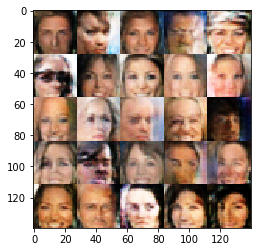

Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.5171
Epoch 1/1... Discriminator Loss: 0.8455... Generator Loss: 1.5399
Epoch 1/1... Discriminator Loss: 1.0430... Generator Loss: 1.7046
Epoch 1/1... Discriminator Loss: 1.0798... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 1.0326
Epoch 1/1... Discriminator Loss: 0.9532... Generator Loss: 0.9888
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 0.8821... Generator Loss: 1.5932
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.6397


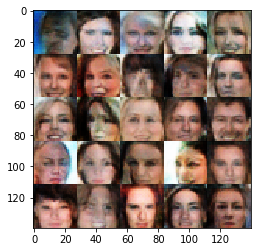

Epoch 1/1... Discriminator Loss: 1.9745... Generator Loss: 0.2727
Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.0764... Generator Loss: 0.9641
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 0.7628... Generator Loss: 1.4877
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 1.0380... Generator Loss: 1.0928
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 1.6068
Epoch 1/1... Discriminator Loss: 1.0483... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.0440... Generator Loss: 0.8804


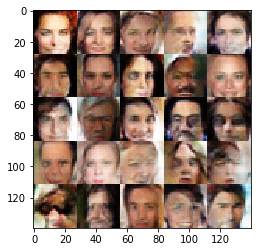

Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 0.8454
Epoch 1/1... Discriminator Loss: 1.0118... Generator Loss: 1.2665
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 1.1537
Epoch 1/1... Discriminator Loss: 0.9290... Generator Loss: 1.0270
Epoch 1/1... Discriminator Loss: 1.0157... Generator Loss: 0.9835
Epoch 1/1... Discriminator Loss: 1.6350... Generator Loss: 0.4194
Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 1.0238
Epoch 1/1... Discriminator Loss: 0.8824... Generator Loss: 1.4443
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 1.0300... Generator Loss: 1.2849


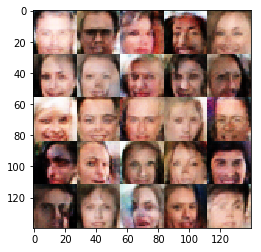

Epoch 1/1... Discriminator Loss: 1.5465... Generator Loss: 0.4064
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 1.2108
Epoch 1/1... Discriminator Loss: 1.7701... Generator Loss: 0.3172
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 1.2312
Epoch 1/1... Discriminator Loss: 1.0823... Generator Loss: 1.0413
Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.7703
Epoch 1/1... Discriminator Loss: 0.9702... Generator Loss: 0.9049
Epoch 1/1... Discriminator Loss: 0.9698... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 1.0663... Generator Loss: 1.0524


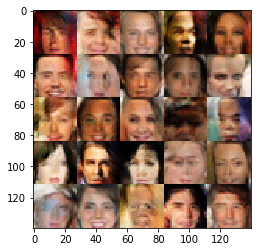

Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 0.8948
Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 0.8741
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.3166
Epoch 1/1... Discriminator Loss: 1.6185... Generator Loss: 0.4040
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.0965
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 1.3490
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 1.6243
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.8965
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 0.8183


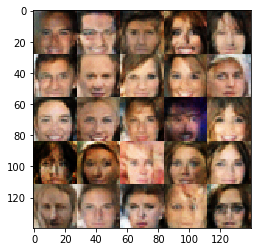

Epoch 1/1... Discriminator Loss: 1.3220... Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 1.0443
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 1.0582... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.5103
Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 1.6615
Epoch 1/1... Discriminator Loss: 1.0198... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.5807


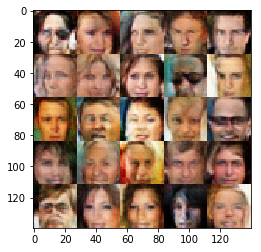

Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 1.0434... Generator Loss: 1.1318
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 1.9464
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.5197... Generator Loss: 0.4477
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.4250
Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 1.0970
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.5172


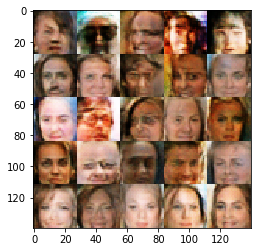

Epoch 1/1... Discriminator Loss: 0.9767... Generator Loss: 1.1511
Epoch 1/1... Discriminator Loss: 1.5401... Generator Loss: 0.4185
Epoch 1/1... Discriminator Loss: 0.8781... Generator Loss: 1.5495


In [14]:
batch_size = 32
z_dim = 128
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.